# Importing Libraries + Setting Path.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split

path = r'C:\Users\Chaot\Python stuff\07 - Basics of Machine Learning for Analysts'

# Importing Data.

In [2]:
cleaned = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'cleaned_weather.csv'), index_col = False)
cleaned

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                      7            0.85          1.0180   
1                      6            0.84          1.0180   
2                      8            0.90          1.0180   
3                      3            0.92          1.0180   
4                      6            0.95          1.0180   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                  6.5             0.8            10.9                     1   
1                  6.1             3.3            10.1                     6   
2                  8.5             5.1             9.9                     6   
3                  6.3             3.8            10.6                     8   
4                  3.0            -0.7             6.0                     8   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0      ...                 4.9                     5               0.88   
1      ...                 5.0                     7               0.91   
2      ...                 4.1                     7               0.91   
3      ...                 2.3                     7               0.86   
4      ...                 4.3                     3               0.80   
...    ...                 ...                   ...                ...   
22945  ...                14.2                     5               0.82   
22946  ...                14.3                     5               0.82   
22947  ...                14.4                     5               0.82   
22948  ...                12.4                     5               0.82   
22949  ...                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142      

In [3]:
pleasant = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)
pleasant

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

# Adding date for 'cleaned' and selecting a decade for Random Forest 1.

In [4]:
cleaned = pd.concat([pleasant[['DATE']],cleaned],axis=1)
cleaned

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101                  7            0.85          1.0180   
1      19600102                  6            0.84          1.0180   
2      19600103                  8            0.90          1.0180   
3      19600104                  3            0.92          1.0180   
4      19600105                  6            0.95          1.0180   
...         ...                ...             ...             ...   
22945  20221027                  1            0.79          1.0248   
22946  20221028                  6            0.77          1.0244   
22947  20221029                  4            0.76          1.0227   
22948  20221030                  5            0.80          1.0212   
22949  20221031                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                  6.5             0.8            10.9  ...   
1                  6.1             3.3            10.1  ...   
2                  8.5             5.1             9.9  ...   
3                  6.3             3.8            10.6  ...   
4                  3.0            -0.7             6.0  ...   
...                ...             ...             ...  ...   
22945             15.9            11.4            21.4  ...   
22946             16.7            14.3            21.9  ...   
22947             16.7            13.1            22.4  ...   
22948             15.4            11.6            21.1  ...   
22949             13.5             9.9            19.2  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                     4.9                     5               0.88   
1                     5.0                     7               0.91   
2                     4.1                     7               0.91   
3                     2.3                     7               0.86   
4                     4.3                     3               0.80   
...                   ...                   ...                ...   
22945                14.2                     5               0.82   
22946                14.3                     5               0.82   
22947                14.4                     5               0.82   
22948                12.4                     5               0.82   
22949                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142                       1.13                    0.41   
22946             1.0142                       1.13                    0.41   
22947             1.

In [5]:
cleaned_2ks = cleaned[cleaned['DATE'].astype(str).str.startswith('200')] 
pleasant_2ks = pleasant[pleasant['DATE'].astype(str).str.startswith('200')] 
cleaned_2ks = cleaned_2ks.drop(['DATE'], axis = 1)
pleasant_2ks = pleasant_2ks.drop(['DATE'], axis = 1)

In [6]:
cleaned_2ks

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610                  8            0.89          1.0286   
14611                  8            0.87          1.0318   
14612                  5            0.81          1.0314   
14613                  7            0.79          1.0262   
14614                  5            0.90          1.0246   
...                  ...             ...             ...   
18258                  7            0.80          1.0118   
18259                  7            0.82          1.0084   
18260                  7            0.92          1.0028   
18261                  8            0.92          0.9979   
18262                  7            0.93          0.9958   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   
...                       ...                  ...             ...   
18258                    0.37                 0.18             2.3   
18259                    0.28                 0.42             0.3   
18260                    0.22                 1.68             0.2   
18261                    0.18                 1.54             0.0   
18262                    0.17                 0.57             0.1   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   
14611              3.6             2.7             4.8                     8   
14612              2.2             0.1             4.8                     5   
14613              3.9             0.5             7.5                     7   
14614              6.0             3.8             8.6                     7   
...                ...             ...             ...                   ...   
18258              1.0            -3.9             5.5                     8   
18259              3.2             1.0             4.8                     4   
18260              4.5             2.4            10.0                     6   
18261              8.5             7.5            11.5                     6   
18262              6.6             4.3             7.9                     6   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
14610  ...                 0.7                     6               0.89   
14611  ...                 2.0                     8               0.92   
14612  ...                 2.8                     4               0.79   
14613  ...                 4.6                     6               0.76   
14614  ...                 2.9                     7               0.81   
...    ...                 ...                   ...                ...   
18258  ...                -2.7                     4               0.72   
18259  ...                 2.4                     8               0.70   
18260  ...                 0.8                     8               0.88   
18261  ...                -7.4                     8               0.87   
18262  ...                -6.5                     6               0.80   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
14610             1.0235                       0.22                    0.10   
14611             1.0177                       0.13                    0.42   
14612             1.0154                       0.22                    1.05   
14613             1.0099                       0.36                    0.34   
14614             0.9957                       0.12                    0.33   
...                  ...                        ...                     ...   
18258             1.0039      

In [7]:
pleasant_2ks

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610                       0                          0   
14611                       0                          0   
14612                       0                          0   
14613                       0                          0   
14614                       0                          0   
...                       ...                        ...   
18258                       0                          0   
18259                       0                          0   
18260                       0                          0   
18261                       0                          0   
18262                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   
...                          ...                      ...   
18258                          0                        0   
18259                          0                        0   
18260                          0                        0   
18261                          0                        0   
18262                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   
...                            ...                        ...   
18258                            0                          0   
18259                            0                          0   
18260                            0                          0   
18261                            0                          0   
18262                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   
...                        ...                         ...   
18258                        0                           0   
18259                        0                           0   
18260                        0                           0   
18261                        0                           0   
18262                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   
...                            ...                      ...   
18258                            0                        0   
18259                            0                        0   
18260                            0                        0   
18261                            0                        0   
18262                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                          0                      0   
14612                          0                      0   
14613                          0  

## Random Forest 1 - Years 2000-2009.

In [8]:
tf.random.set_seed(42)

In [9]:
X = cleaned_2ks
y = pleasant_2ks
X

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610                  8            0.89          1.0286   
14611                  8            0.87          1.0318   
14612                  5            0.81          1.0314   
14613                  7            0.79          1.0262   
14614                  5            0.90          1.0246   
...                  ...             ...             ...   
18258                  7            0.80          1.0118   
18259                  7            0.82          1.0084   
18260                  7            0.92          1.0028   
18261                  8            0.92          0.9979   
18262                  7            0.93          0.9958   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   
...                       ...                  ...             ...   
18258                    0.37                 0.18             2.3   
18259                    0.28                 0.42             0.3   
18260                    0.22                 1.68             0.2   
18261                    0.18                 1.54             0.0   
18262                    0.17                 0.57             0.1   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   
14611              3.6             2.7             4.8                     8   
14612              2.2             0.1             4.8                     5   
14613              3.9             0.5             7.5                     7   
14614              6.0             3.8             8.6                     7   
...                ...             ...             ...                   ...   
18258              1.0            -3.9             5.5                     8   
18259              3.2             1.0             4.8                     4   
18260              4.5             2.4            10.0                     6   
18261              8.5             7.5            11.5                     6   
18262              6.6             4.3             7.9                     6   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
14610  ...                 0.7                     6               0.89   
14611  ...                 2.0                     8               0.92   
14612  ...                 2.8                     4               0.79   
14613  ...                 4.6                     6               0.76   
14614  ...                 2.9                     7               0.81   
...    ...                 ...                   ...                ...   
18258  ...                -2.7                     4               0.72   
18259  ...                 2.4                     8               0.70   
18260  ...                 0.8                     8               0.88   
18261  ...                -7.4                     8               0.87   
18262  ...                -6.5                     6               0.80   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
14610             1.0235                       0.22                    0.10   
14611             1.0177                       0.13                    0.42   
14612             1.0154                       0.22                    1.05   
14613             1.0099                       0.36                    0.34   
14614             0.9957                       0.12                    0.33   
...                  ...                        ...                     ...   
18258             1.0039      

In [10]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [11]:
y = pleasant_2ks.max(axis=1)
print('Shape of y', y.shape)
print('Unique values in y:', y.unique())

Shape of y (3653,)
Unique values in y: [0 1]


In [12]:
y = y.to_numpy().reshape(-1)
y.shape

(3653,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922,)
(731, 135) (731,)


In [14]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10) 
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [15]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9671682626538988


In [16]:
pred = ['Unpleasant Weather','Pleasant Weather']

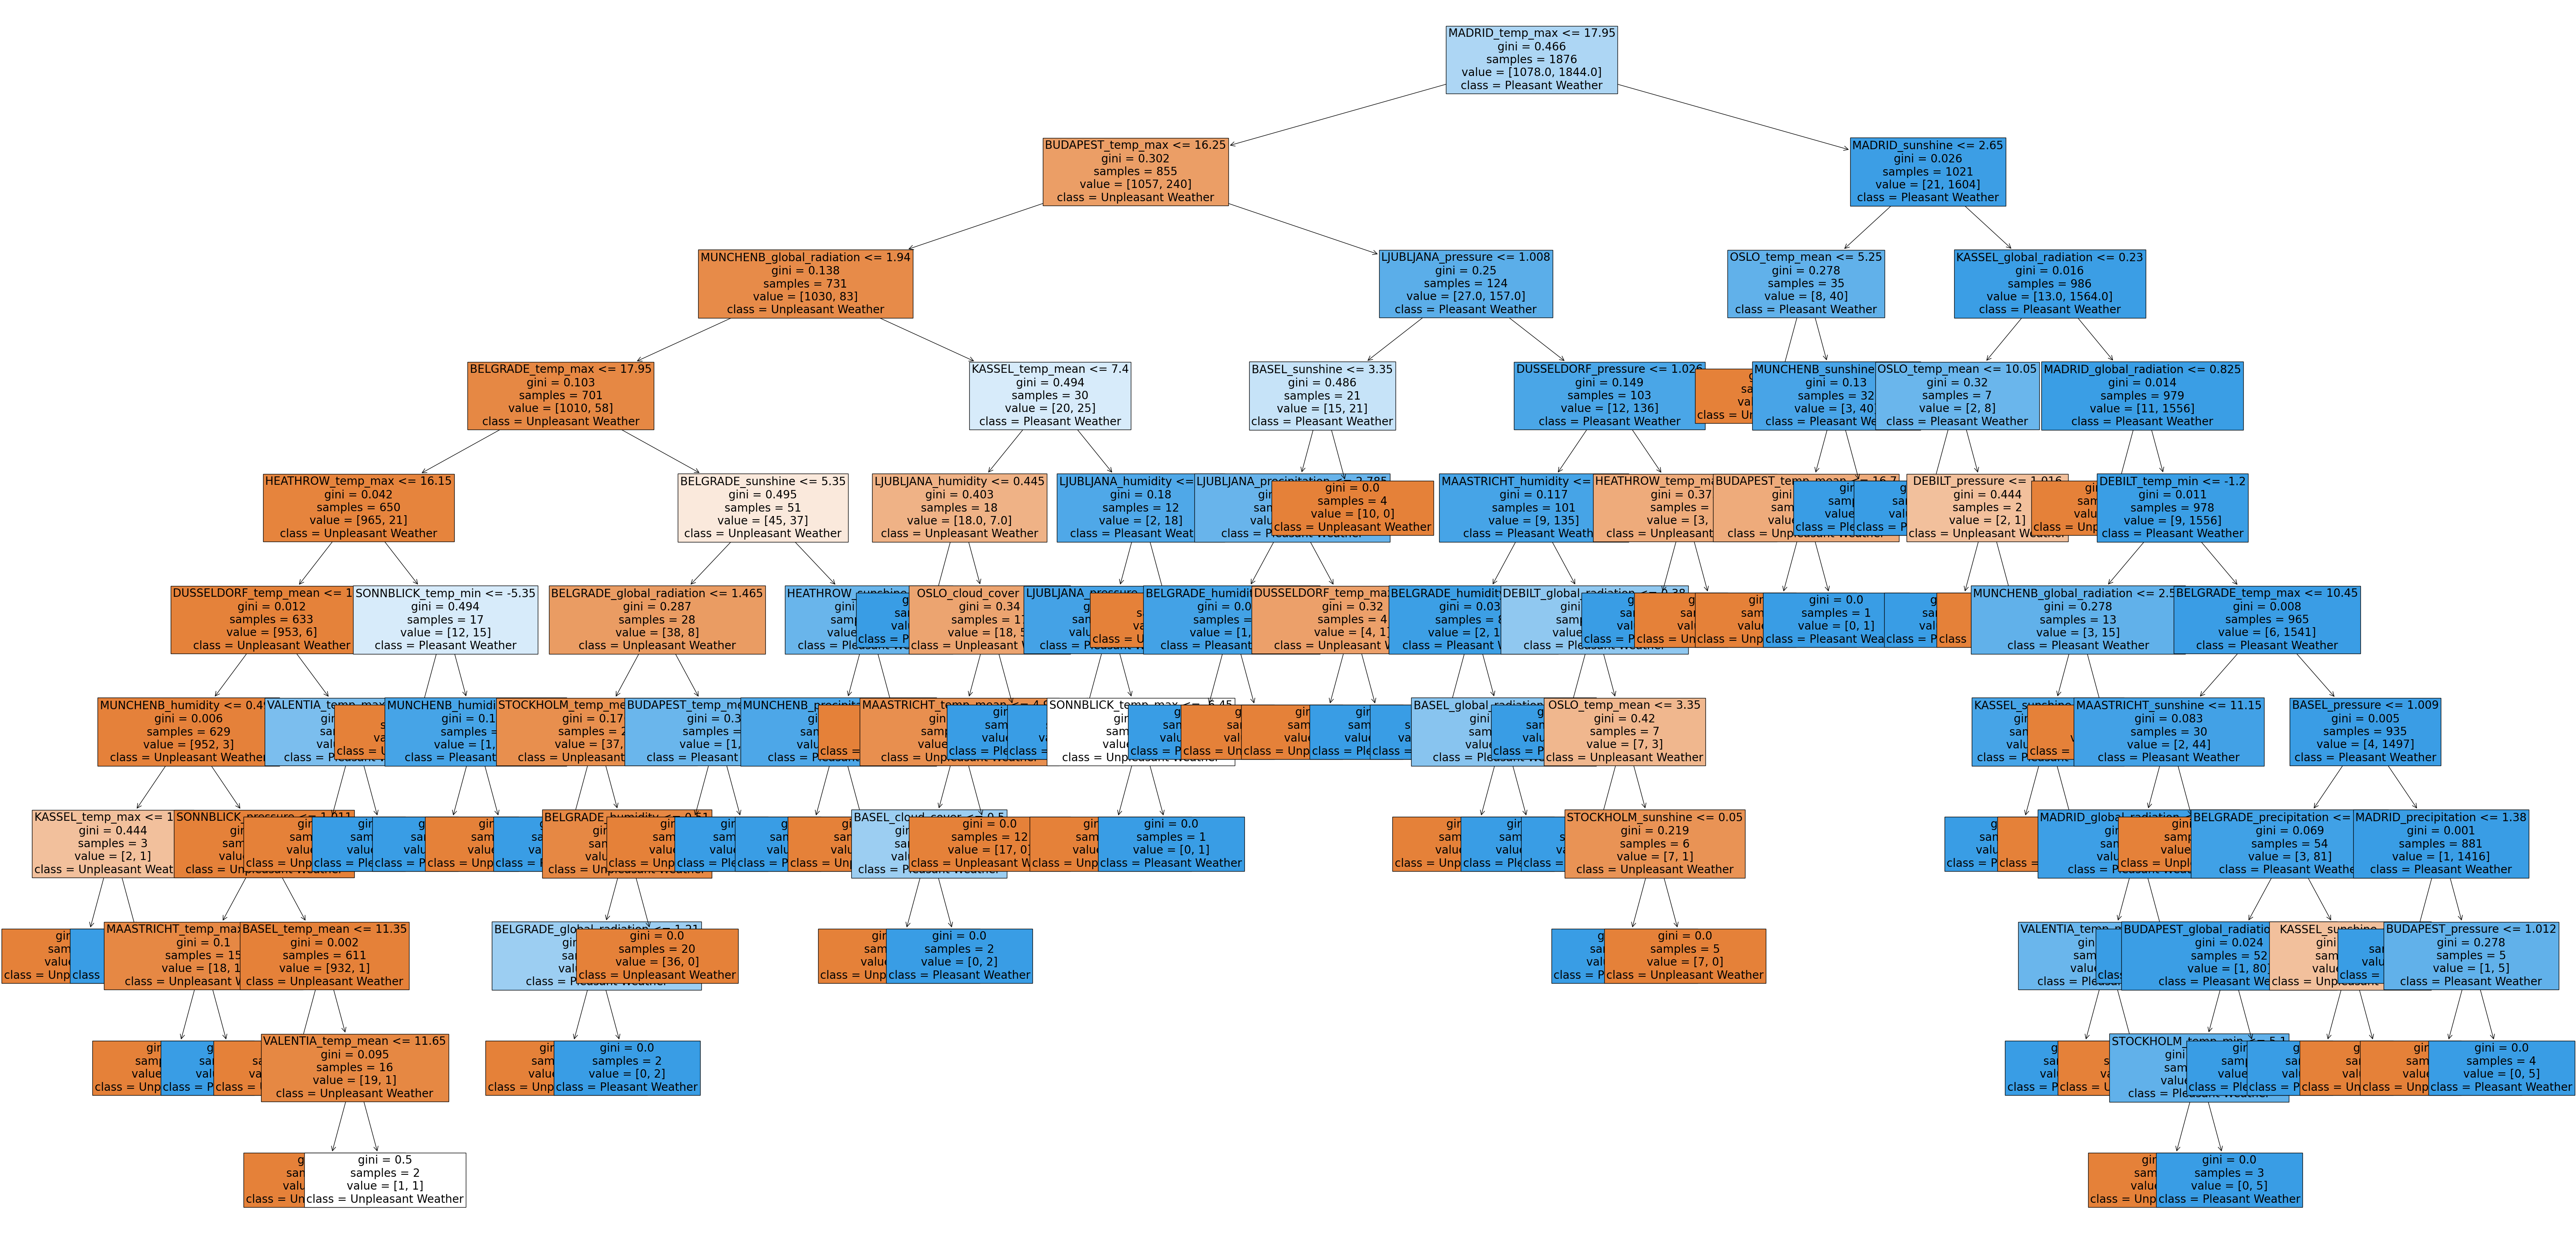

In [17]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, feature_names=cleaned_2ks.columns, class_names=['Unpleasant Weather', 'Pleasant Weather'], filled=True)
fig.savefig(os.path.join(path, 'Unsupervised','2.3_2000s_forest.png'))
plt.show();

### Important Weatherstations of 2000's

In [18]:
feature_importances = clf.feature_importances_
print('Feature Importances:', feature_importances)
print(feature_importances.shape)

Feature Importances: [0.00047133 0.00107547 0.00145981 0.00233991 0.00067202 0.00121338
 0.01466363 0.01283222 0.01659157 0.00098062 0.0037293  0.00144974
 0.00541327 0.0028829  0.00268319 0.03012783 0.00247516 0.01711226
 0.0005851  0.00165293 0.00122153 0.0221001  0.00074315 0.00299528
 0.04538272 0.01451723 0.04176003 0.00039973 0.0010315  0.00096418
 0.00399754 0.00065447 0.00099494 0.02374438 0.00169085 0.01681044
 0.0005096  0.00105921 0.0008652  0.00469193 0.00039183 0.00094163
 0.00941196 0.00154182 0.02306243 0.00060299 0.00116535 0.00116134
 0.00797704 0.00054064 0.0009342  0.00898095 0.00160716 0.00044005
 0.00921727 0.00090416 0.00109015 0.00298029 0.00062363 0.00090102
 0.03498871 0.00618442 0.03378018 0.00054059 0.0018901  0.00174126
 0.00358687 0.00140281 0.00119037 0.04610796 0.00303989 0.05659817
 0.00048206 0.00093178 0.00117372 0.00190643 0.00064322 0.00091001
 0.01410568 0.0019902  0.01219418 0.00099798 0.00403615 0.00211287
 0.0227289  0.00333548 0.00394027 0.07752

In [19]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances = feature_importances.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances.shape)

Reshaped Importances Shape: (1, 15, 9)


In [20]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances = np.sum(reshaped_importances[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances.shape)
print("Collapsed Importances:", collapsed_importances)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.05131934 0.06685427 0.13095807 0.05028804 0.04247561 0.02340971
 0.09066984 0.11609801 0.03433726 0.23816303 0.07981447 0.02187275
 0.01737963 0.02303539 0.01332459]


In [21]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [22]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances
})

In [23]:
# Sort by importance for chart readability
collapsed_importances = collapsed_importances.sort_values(by='Importance', ascending=False)
print('Collapsed Feature Importances:')
print(collapsed_importances)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.238163
2         BUDAPEST    0.130958
7        LJUBLJANA    0.116098
6           KASSEL    0.090670
10        MUNCHENB    0.079814
1         BELGRADE    0.066854
0            BASEL    0.051319
3           DEBILT    0.050288
4       DUSSELDORF    0.042476
8       MAASTRICHT    0.034337
5         HEATHROW    0.023410
13       STOCKHOLM    0.023035
11            OSLO    0.021873
12       SONNBLICK    0.017380
14        VALENTIA    0.013325


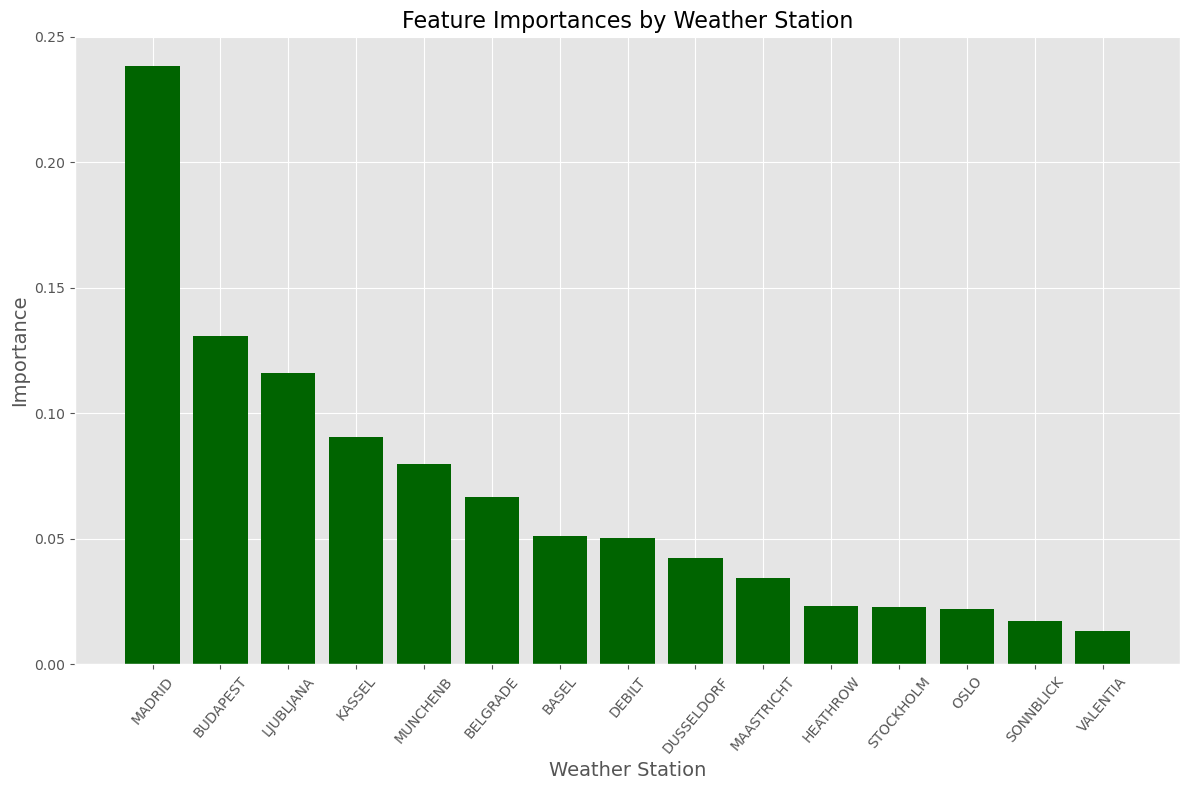

In [24]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances['Weather Station'], collapsed_importances['Importance'], color='darkgreen')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Unsupervised','2.3_2000s_weather_stations.png'), bbox_inches = 'tight')
plt.show()

#### Our top three are Madrid, Budapest and Ljubljana.

## Random Forest 2 - Years 1990-1999.

In [25]:
cleaned_90s = cleaned[cleaned['DATE'].astype(str).str.startswith('199')] 
pleasant_90s = pleasant[pleasant['DATE'].astype(str).str.startswith('199')] 
cleaned_90s = cleaned_90s.drop(['DATE'], axis = 1)
pleasant_90s = pleasant_90s.drop(['DATE'], axis = 1)

In [26]:
X = cleaned_90s
y = pleasant_90s
X

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958                  0            0.83          1.0217   
10959                  2            0.84          1.0238   
10960                  8            0.89          1.0231   
10961                  2            0.77          1.0265   
10962                  7            0.81          1.0286   
...                  ...             ...             ...   
14605                  7            0.74          0.9953   
14606                  8            0.88          0.9956   
14607                  8            0.84          1.0162   
14608                  7            0.80          1.0276   
14609                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   
...                ...             ...             ...                   ...   
14605              5.0             1.5             6.5                     5   
14606              2.4             1.0             3.4                     8   
14607              1.8             1.0             2.7                     6   
14608              1.1            -0.3             3.4                     3   
14609              0.7            -0.7             1.9                     7   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
10958  ...                -0.3                     3               0.82   
10959  ...                -3.4                     5               0.79   
10960  ...                -2.6                     4               0.90   
10961  ...                 0.5                     6               0.93   
10962  ...                 0.8                     4               0.91   
...    ...                 ...                   ...                ...   
14605  ...                 1.6                     7               0.75   
14606  ...                 1.0                     3               0.73   
14607  ...                -1.1                     5               0.81   
14608  ...                -2.5                     8               0.94   
14609  ...                -7.0                     6               0.94   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
10958             1.0068                       0.20                    0.51   
10959             1.0040                       0.21                    1.48   
10960             1.0094                       0.38                    0.00   
10961             1.0112                       0.13                    0.92   
10962             1.0108                       0.20                    0.56   
...                  ...                        ...                     ...   
14605             0.9954      

In [27]:
y = pleasant_90s.max(axis=1)
print('Shape of y', y.shape)
print('Unique values in y:', y.unique())

Shape of y (3652,)
Unique values in y: [0 1]


In [28]:
y = y.to_numpy().reshape(-1)
y.shape

(3652,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921,)
(731, 135) (731,)


In [30]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [31]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))


Model Accuracy:  0.9534883720930233


In [32]:
pred = ['Unpleasant Weather','Pleasant Weather']

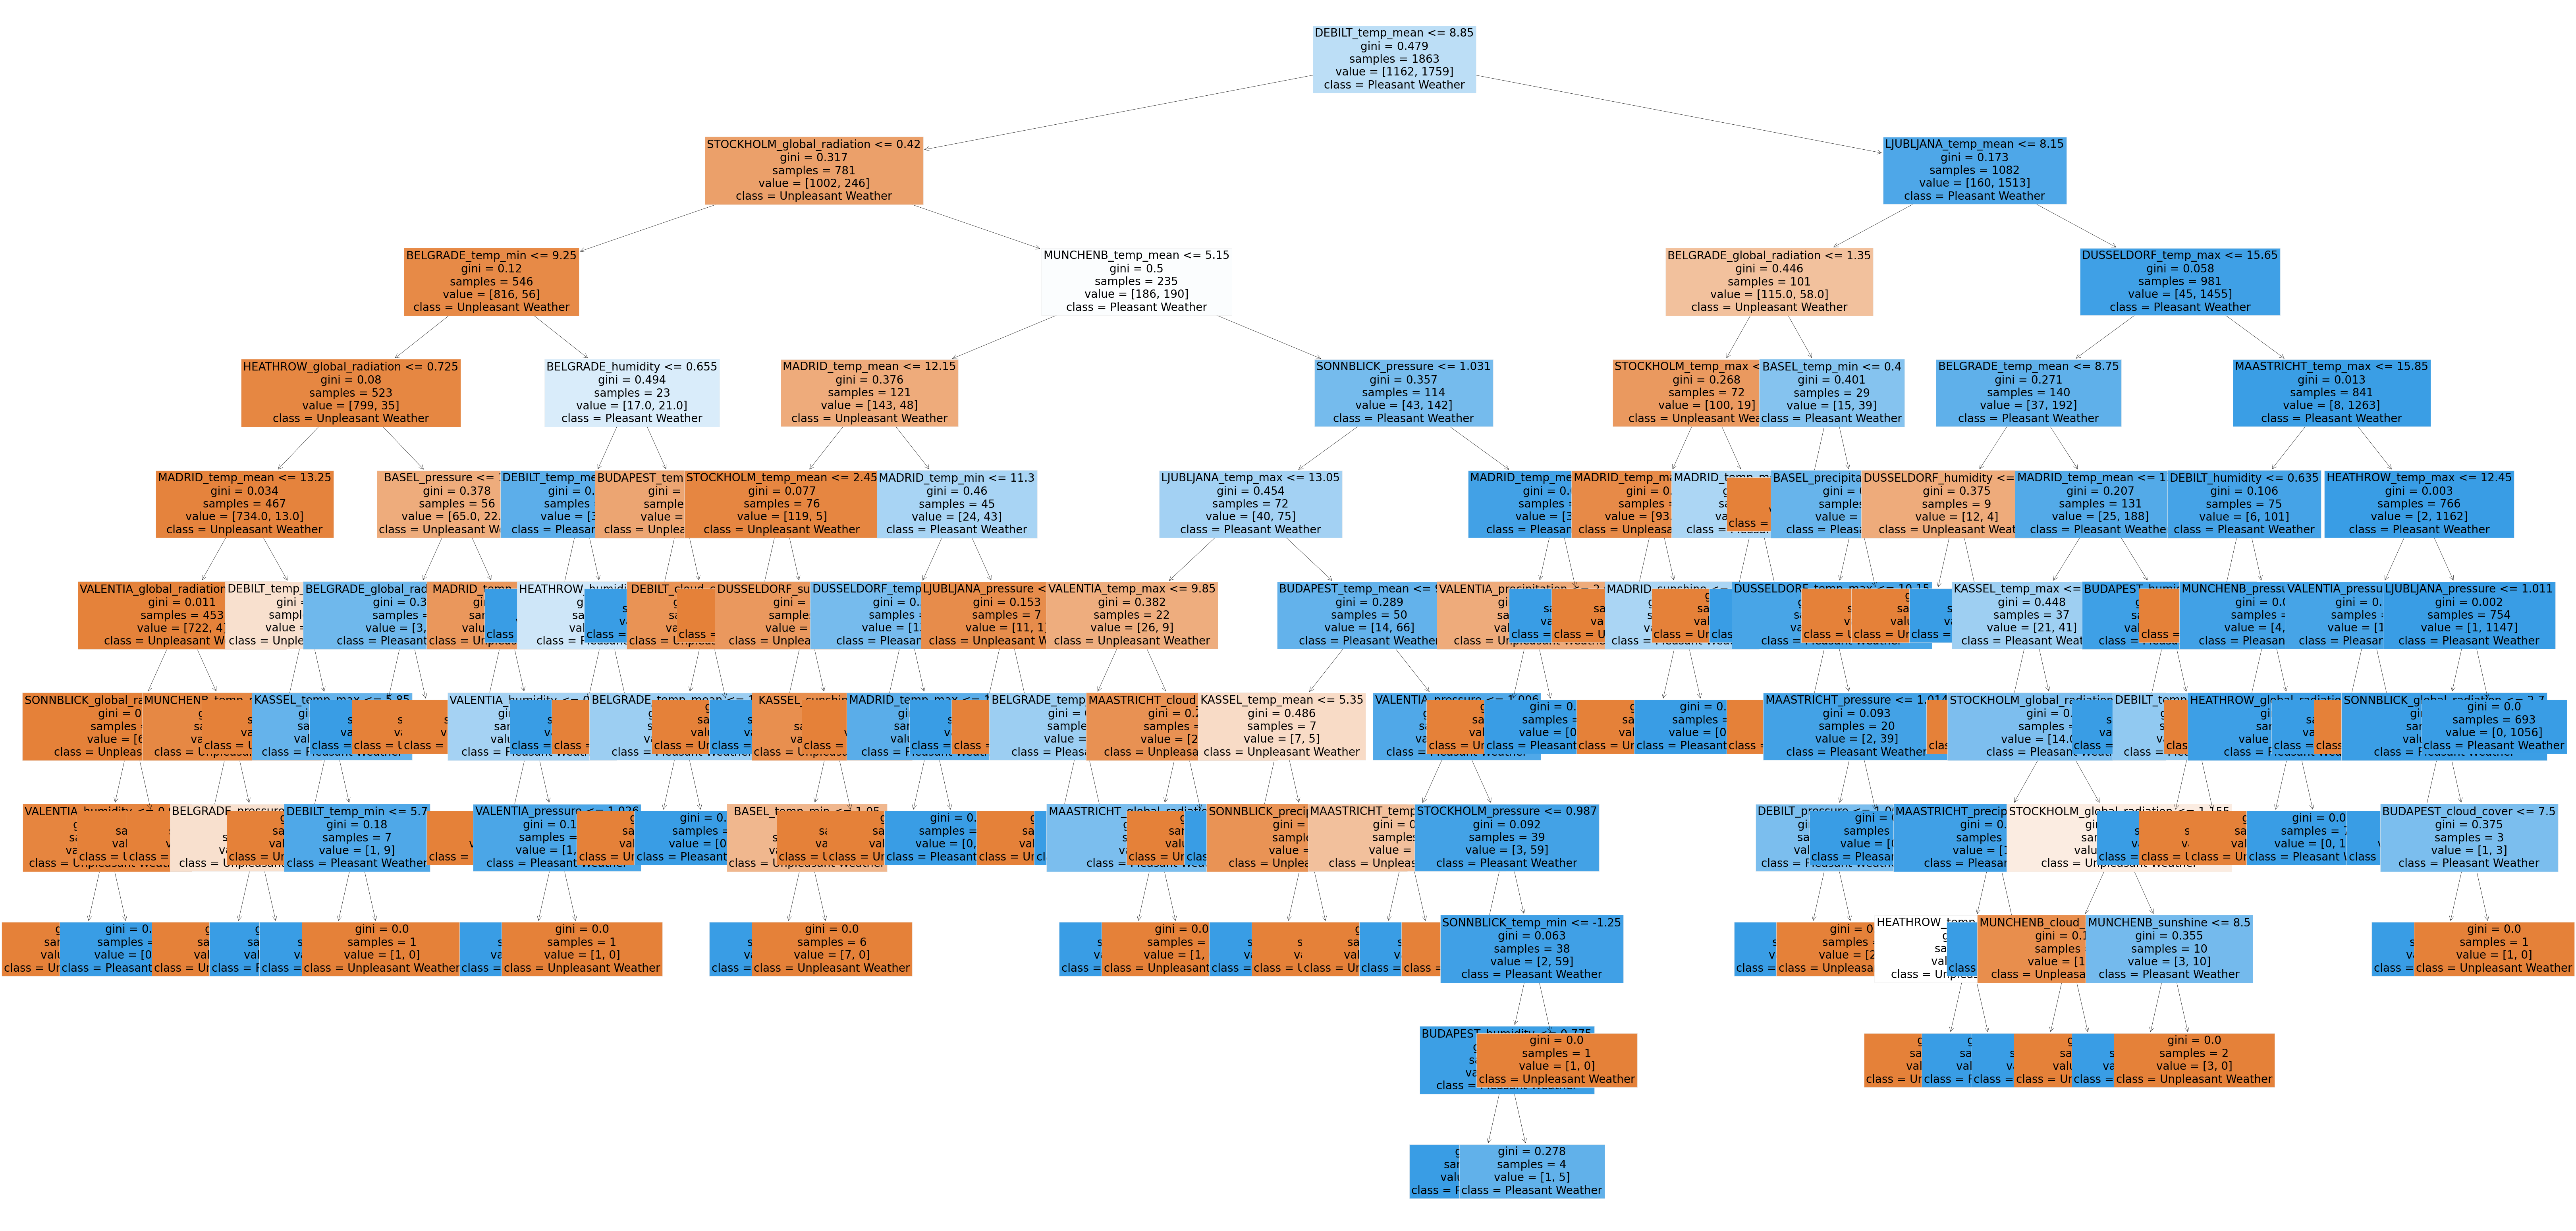

In [33]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, feature_names=cleaned_90s.columns, class_names=['Unpleasant Weather', 'Pleasant Weather'], filled=True)
fig.savefig(os.path.join(path, 'Unsupervised','2.3_1990s_forest.png'))
plt.show();


### Important Weatherstations of 1990s.

In [34]:
feature_importances = clf.feature_importances_
print('Feature Importances:', feature_importances)
print(feature_importances.shape)


Feature Importances: [0.00043273 0.00105236 0.00127225 0.00244805 0.0009533  0.00095008
 0.03433517 0.00776109 0.01461484 0.00079079 0.00270255 0.001295
 0.00445655 0.00252172 0.00257333 0.01968029 0.00251105 0.00960804
 0.00063547 0.00161732 0.00121175 0.00583868 0.00158669 0.00145088
 0.033933   0.01284627 0.0332943  0.00049338 0.0010179  0.00124812
 0.00215016 0.00051448 0.00089773 0.00830779 0.00148516 0.01783052
 0.00053367 0.00110396 0.00092877 0.00324027 0.00073834 0.00091548
 0.01924619 0.00107514 0.01594464 0.00043302 0.00080026 0.0010033
 0.00654645 0.00100168 0.00148137 0.00299464 0.00178921 0.0005232
 0.00772861 0.00104895 0.0010871  0.00242297 0.00061235 0.00052465
 0.02022938 0.00625029 0.01578811 0.00055385 0.00146869 0.00145965
 0.00733653 0.00131477 0.00176535 0.07512548 0.00269572 0.08771146
 0.00084466 0.00080238 0.00080121 0.00198479 0.00070244 0.00081653
 0.02658565 0.00099232 0.02197874 0.00149147 0.00441298 0.00192564
 0.00925121 0.00180368 0.00500243 0.07642187 

In [35]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances = feature_importances.reshape(-1, 15, 9)

In [36]:
# Check shape
print('Reshaped Importances Shape:', reshaped_importances.shape)

Reshaped Importances Shape: (1, 15, 9)


In [37]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances = np.sum(reshaped_importances[0], axis=1)

In [38]:
# Check shape
print('Collapsed Importances Shape:', collapsed_importances.shape)
print('Collapsed Importances:', collapsed_importances)


Collapsed Importances Shape: (15,)
Collapsed Importances: [0.06381987 0.04613933 0.09241435 0.03394524 0.04372647 0.01657314
 0.0556924  0.17943151 0.05550872 0.2205674  0.06656382 0.04187472
 0.01270786 0.05981194 0.01122324]


In [39]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances
})


In [40]:
# Sort by importance for chart readability
collapsed_importances = collapsed_importances.sort_values(by='Importance', ascending=False)
print('Collapsed Feature Importances:')
print(collapsed_importances)


Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.220567
7        LJUBLJANA    0.179432
2         BUDAPEST    0.092414
10        MUNCHENB    0.066564
0            BASEL    0.063820
13       STOCKHOLM    0.059812
6           KASSEL    0.055692
8       MAASTRICHT    0.055509
1         BELGRADE    0.046139
4       DUSSELDORF    0.043726
11            OSLO    0.041875
3           DEBILT    0.033945
5         HEATHROW    0.016573
12       SONNBLICK    0.012708
14        VALENTIA    0.011223


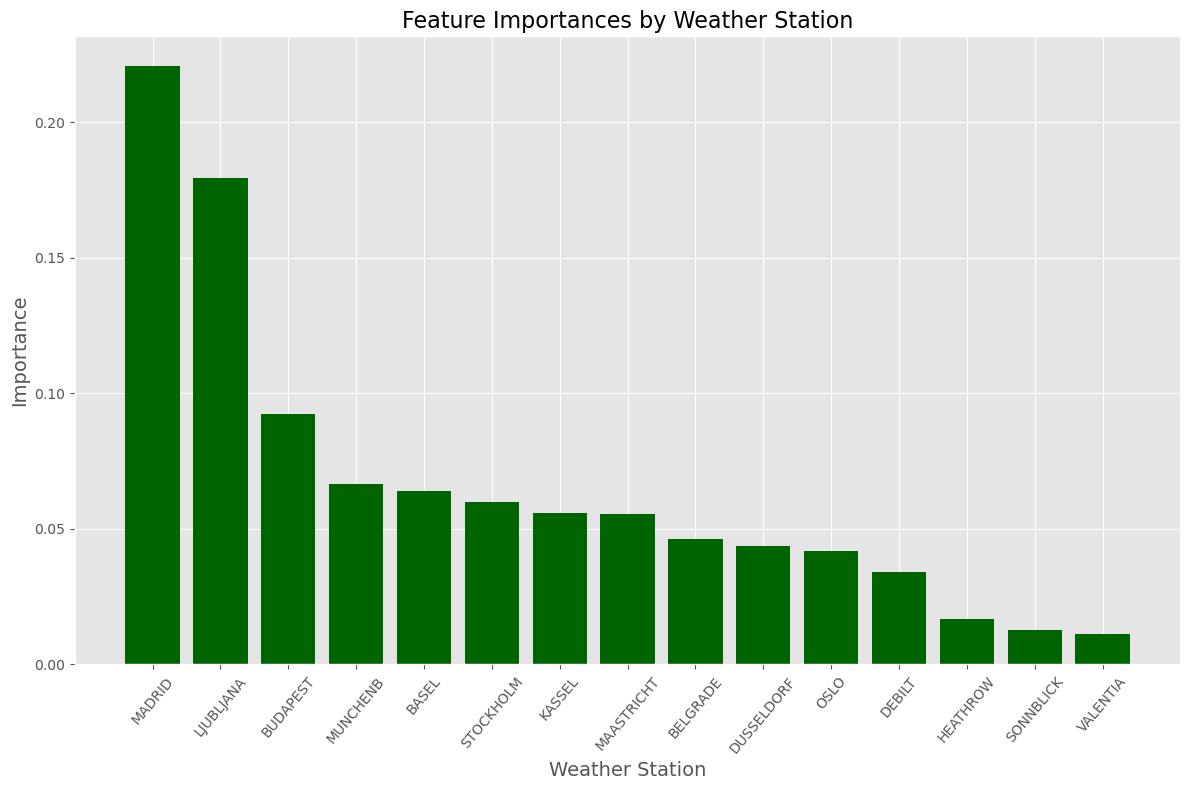

In [41]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances['Weather Station'], collapsed_importances['Importance'], color='darkgreen')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Unsupervised','2.3_1990s_weather_stations.png'), bbox_inches = 'tight')
plt.show()


#### Our important weather stations are again Madrid, Llubjana and Budapest.

## Madrid's Random Forest.

In [42]:
madrid = cleaned[cleaned.columns[cleaned.columns.astype(str).str.startswith('MADRID')]]

# Check output
madrid.shape

(22950, 9)

In [43]:
p_madrid = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('MADRID')]]

# Check output
p_madrid.shape

(22950, 1)

In [44]:
# Create matrices
y = p_madrid.max(axis=1)

# Check shape
print('Shape of y', y.shape)
print('Unique values in y', y.unique())

Shape of y (22950,)
Unique values in y [0 1]


In [45]:
# Ensure y has the correct shape
y = y.to_numpy().reshape(-1)

# Check shape
print(y.shape)

(22950,)


In [46]:
# Create X matrix
X = madrid.to_numpy()

# Check shapes of the matrices
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [47]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=127)

# Check shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [48]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [49]:
# Perform the predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


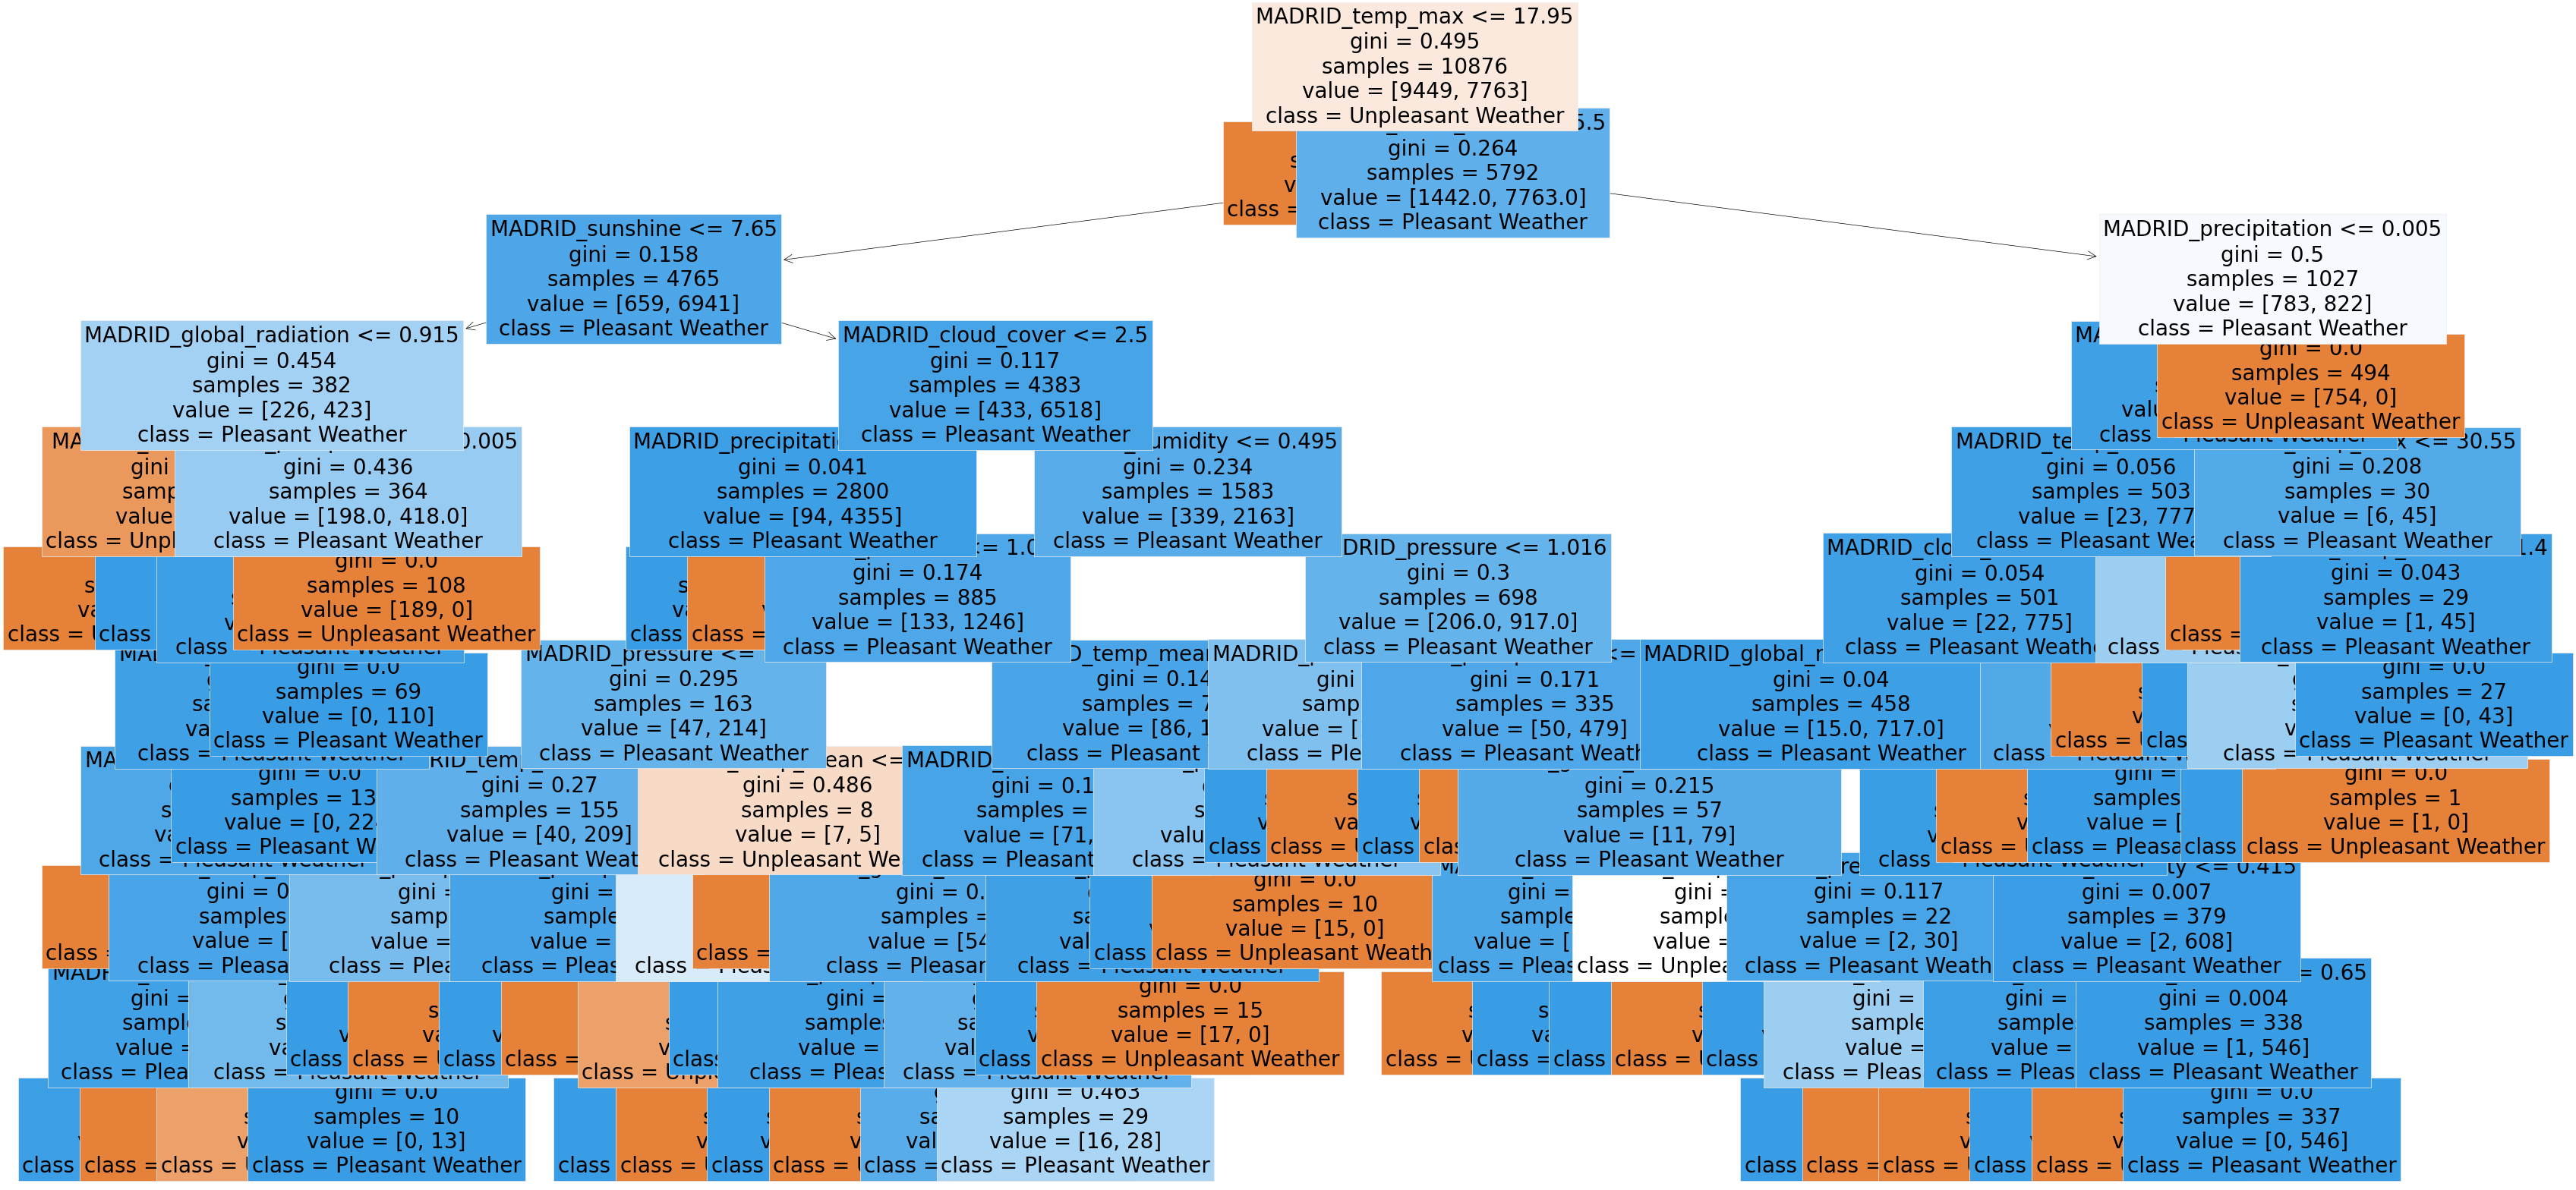

In [50]:
# Plot random forest (Madrid)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf.estimators_[5], fontsize = 20, feature_names=madrid.columns, class_names=['Unpleasant Weather','Pleasant Weather'], filled=True)
plt.savefig(os.path.join(path, 'Unsupervised','2.3_madrid_forest.png'), bbox_inches = 'tight')
plt.show();

### Madrid's Important Measurements.

In [51]:
# Retrieve feature importances from the trained model
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)
print(feature_importances.shape)

Feature Importances: [0.01558018 0.02508591 0.00276984 0.07740183 0.21384905 0.06844044
 0.19357604 0.04927334 0.35402336]
(9,)


In [52]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [53]:
# Create a dataframe to associate observation measurements with their importances
importances_df = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances
})

In [54]:
# Sort by importance for chart readability
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df)

Feature Importance:
        Measurement  Importance
8          temp_max    0.354023
4     precipitation    0.213849
6         temp_mean    0.193576
3  global_radiation    0.077402
5          sunshine    0.068440
7          temp_min    0.049273
1          humidity    0.025086
0       cloud_cover    0.015580
2          pressure    0.002770


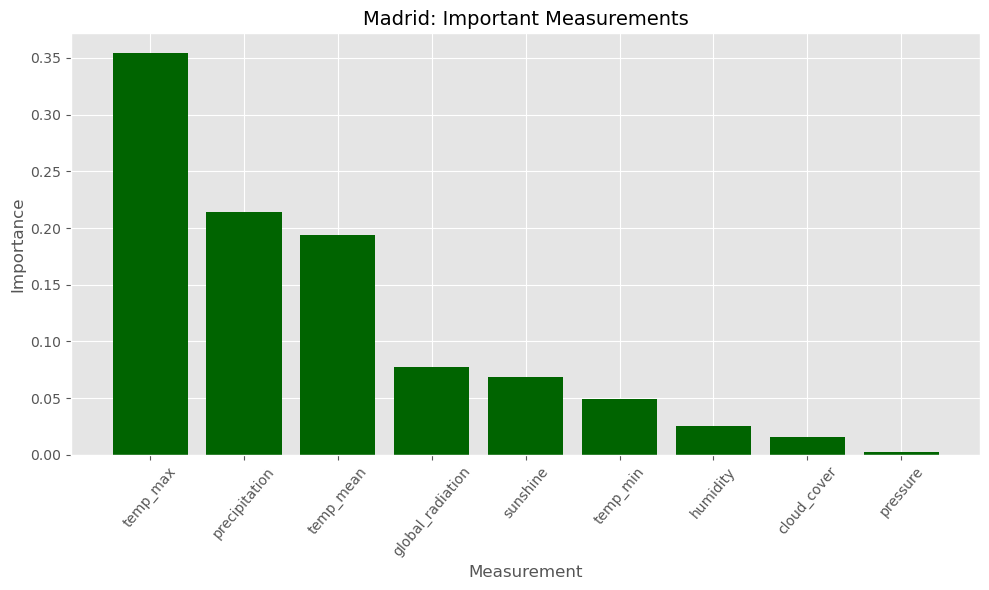

In [55]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df['Measurement'], importances_df['Importance'], color='darkgreen')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Important Measurements", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Unsupervised','2.3_madrid_important_measurements.png'), bbox_inches = 'tight')
plt.show()

### Our top three measurements areTemp Max, Temp Mean and Global Radiation.

## Budapest's Random Forest.

In [56]:
budapest = cleaned[cleaned.columns[cleaned.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
budapest.shape

(22950, 9)

In [57]:
p_budapest = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
p_budapest.shape

(22950, 1)

In [58]:
# Create matrices
y = p_budapest.max(axis=1)

# Check shape
print('Shape of y', y.shape)
print('Unique values in y', y.unique())

Shape of y (22950,)
Unique values in y [0 1]


In [59]:
# Ensure y has the correct shape
y = y.to_numpy().reshape(-1)

# Check shape
print(y.shape)

(22950,)


In [60]:
# Create X matrix
X = budapest.to_numpy()

# Check shapes of the matrices
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [61]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=127)

# Check shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [62]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [63]:
# Perform the predictions on the test dataset
y_pred = clf.predict(X_test)

In [64]:
# Use metrics module for accuracy calculation
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


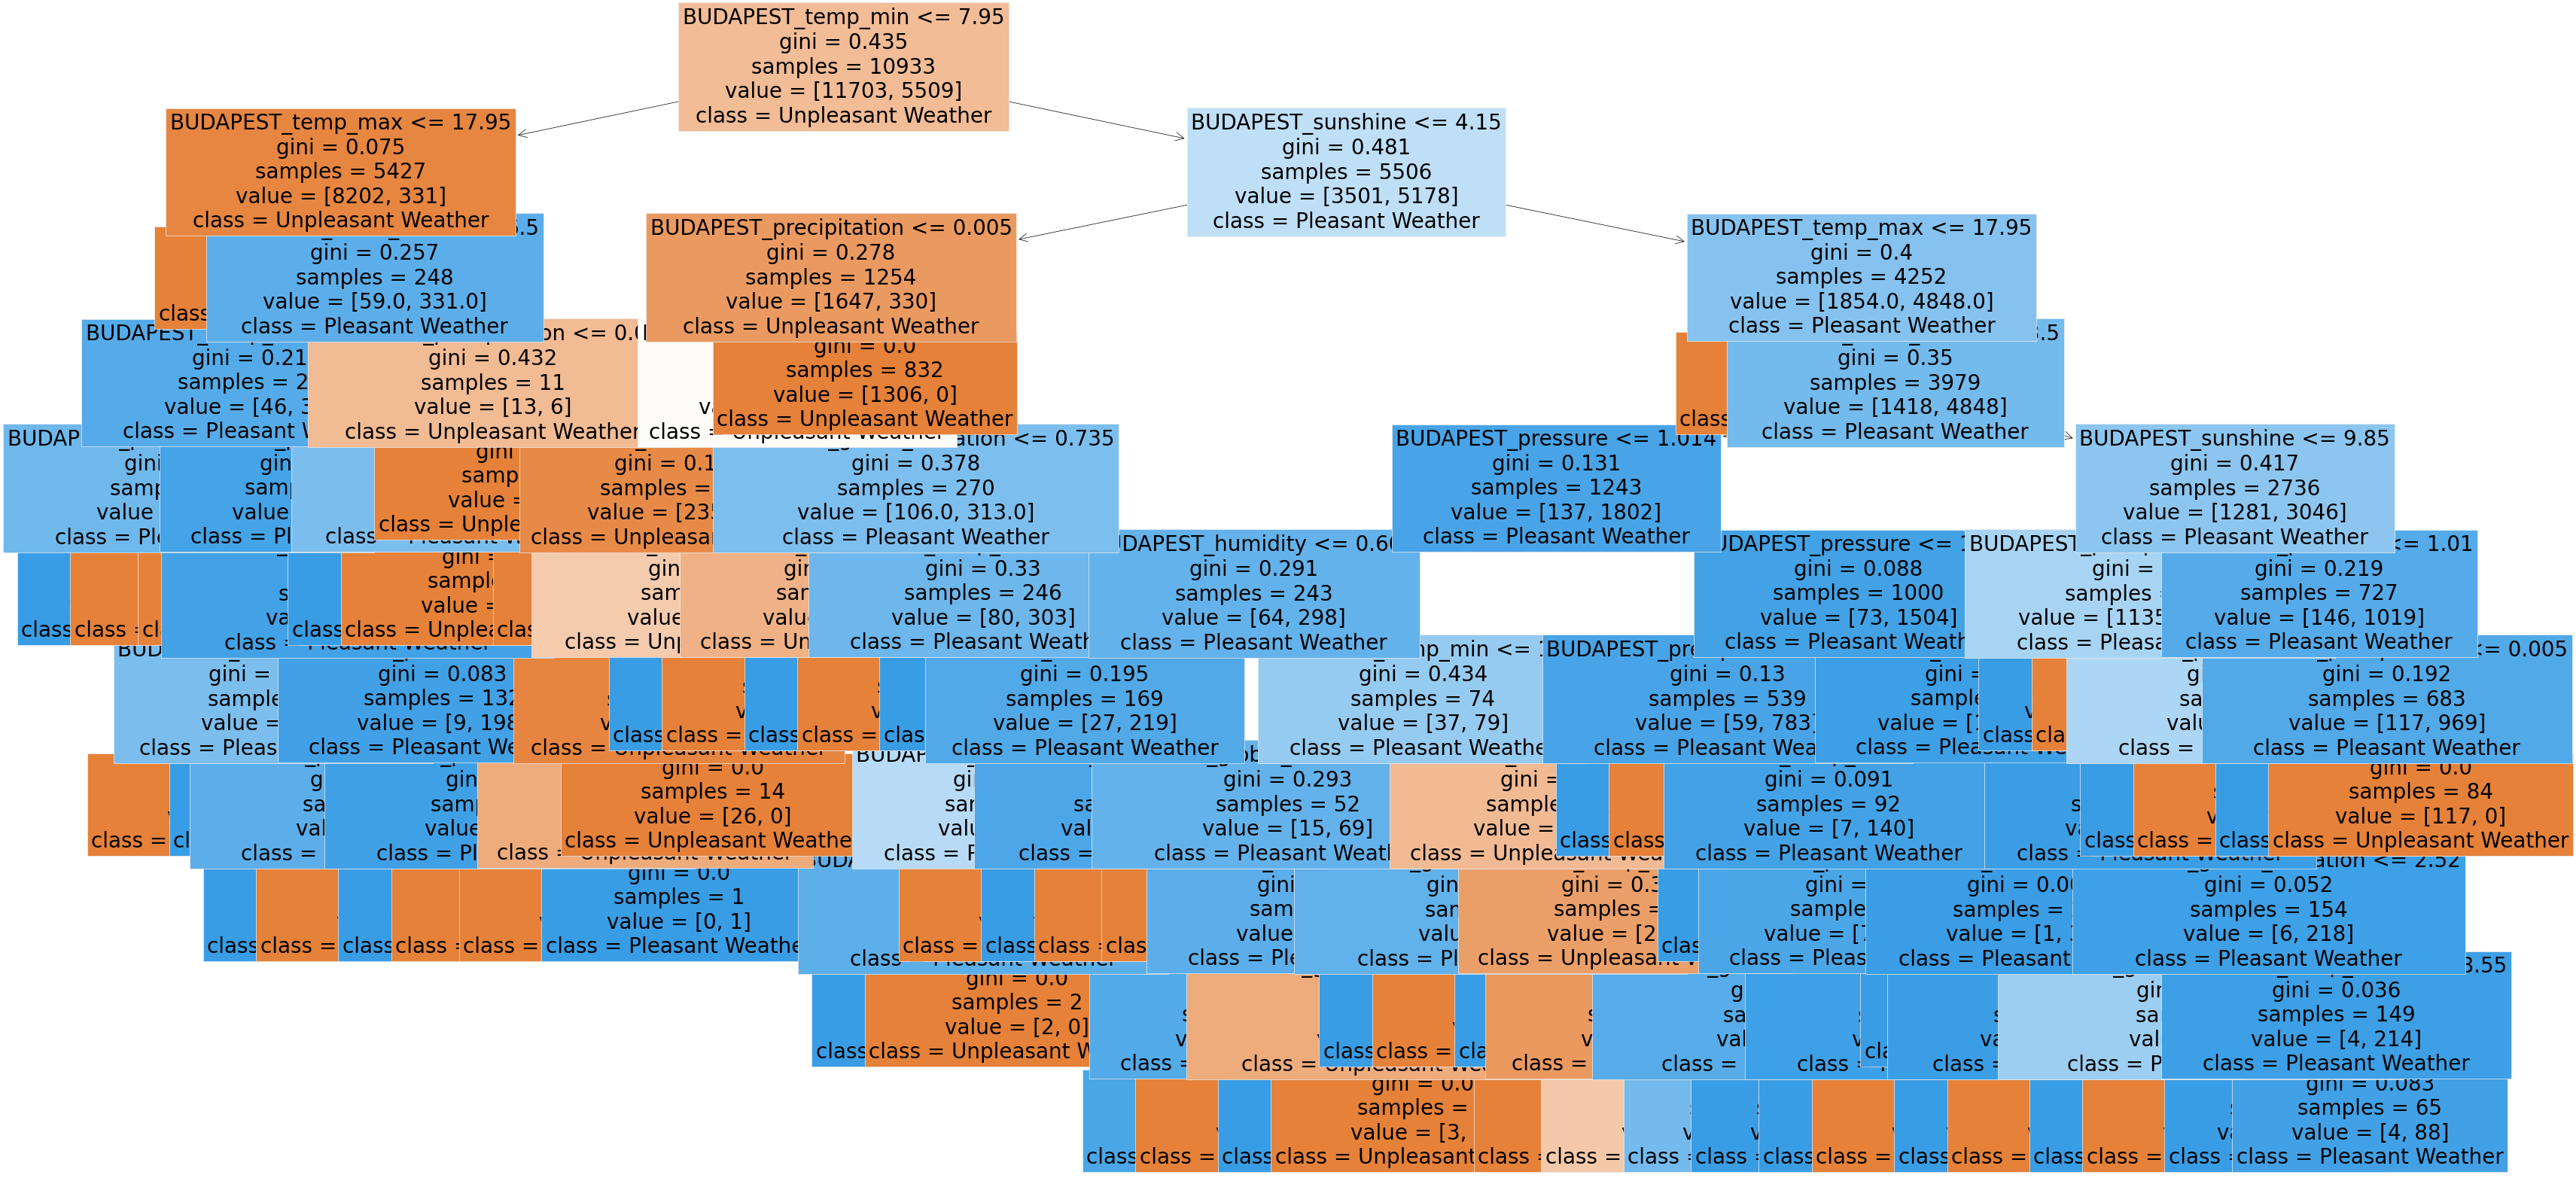

In [65]:
# Plot random forest (Budapest)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf.estimators_[5], fontsize = 20, feature_names=budapest.columns, class_names=['Unpleasant Weather','Pleasant Weather'], filled=True)
plt.savefig(os.path.join(path, 'Unsupervised','2.3_budapest_forest.png'), bbox_inches = 'tight')
plt.show();

### Budapest's Important Measurements.

In [66]:
# Retrieve feature importances from the trained model
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)
print(feature_importances.shape)

Feature Importances: [0.01149974 0.00714315 0.00388136 0.06203937 0.33647429 0.07850915
 0.15447144 0.09003779 0.25594371]
(9,)


In [67]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]


In [68]:
# Create a dataframe to associate observation measurements with their importances
importances_df = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances
})


In [69]:
# Sort by importance for chart readability
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df)


Feature Importance:
        Measurement  Importance
4     precipitation    0.336474
8          temp_max    0.255944
6         temp_mean    0.154471
7          temp_min    0.090038
5          sunshine    0.078509
3  global_radiation    0.062039
0       cloud_cover    0.011500
1          humidity    0.007143
2          pressure    0.003881


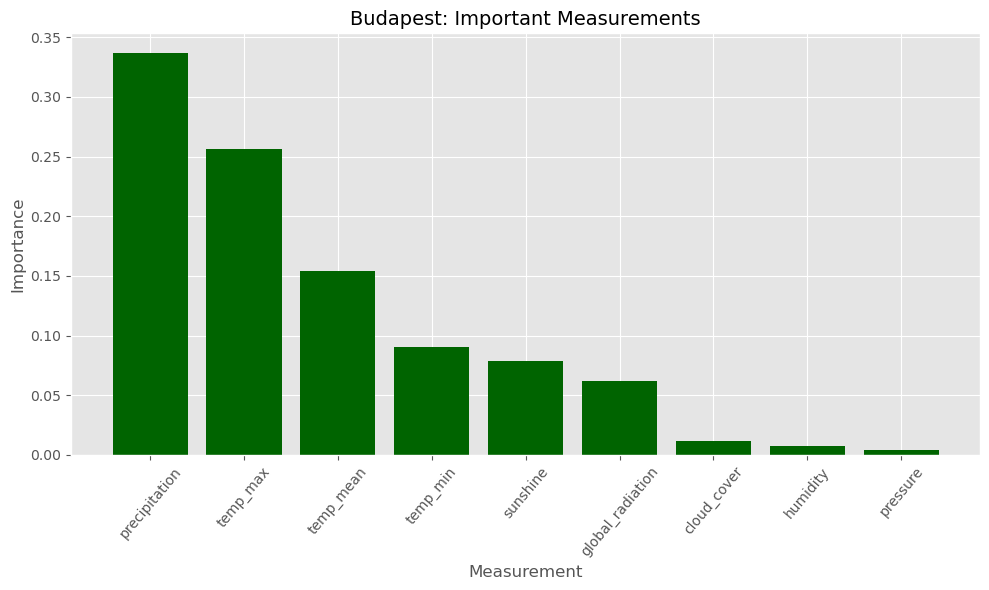

In [70]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df['Measurement'], importances_df['Importance'], color='darkgreen')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Important Measurements", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Unsupervised','2.3_budapest_important_measurements.png'), bbox_inches = 'tight')
plt.show()

### Budapest's top three measurements are Precipitation, Temp max and Temp Mean.

## Ljubljana's Random Forest.

In [71]:
ljubljana = cleaned[cleaned.columns[cleaned.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
ljubljana.shape

(22950, 9)

In [72]:
p_ljubljana = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
p_ljubljana.shape

(22950, 1)

In [73]:
# Create matrices
y = p_ljubljana.max(axis=1)

# Check shape
print('Shape of y', y.shape)
print('Unique values in y', y.unique())

Shape of y (22950,)
Unique values in y [0 1]


In [74]:
# Ensure y has the correct shape
y = y.to_numpy().reshape(-1)

# Check shape
print(y.shape)


(22950,)


In [75]:
# Create X matrix
X = ljubljana.to_numpy()

# Check shapes of the matrices
print(X.shape)
print(y.shape)


(22950, 9)
(22950,)


In [76]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=127)

# Check shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [77]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [78]:
# Perform the predictions on the test dataset
y_pred = clf.predict(X_test)

In [79]:
# Use metrics module for accuracy calculation
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


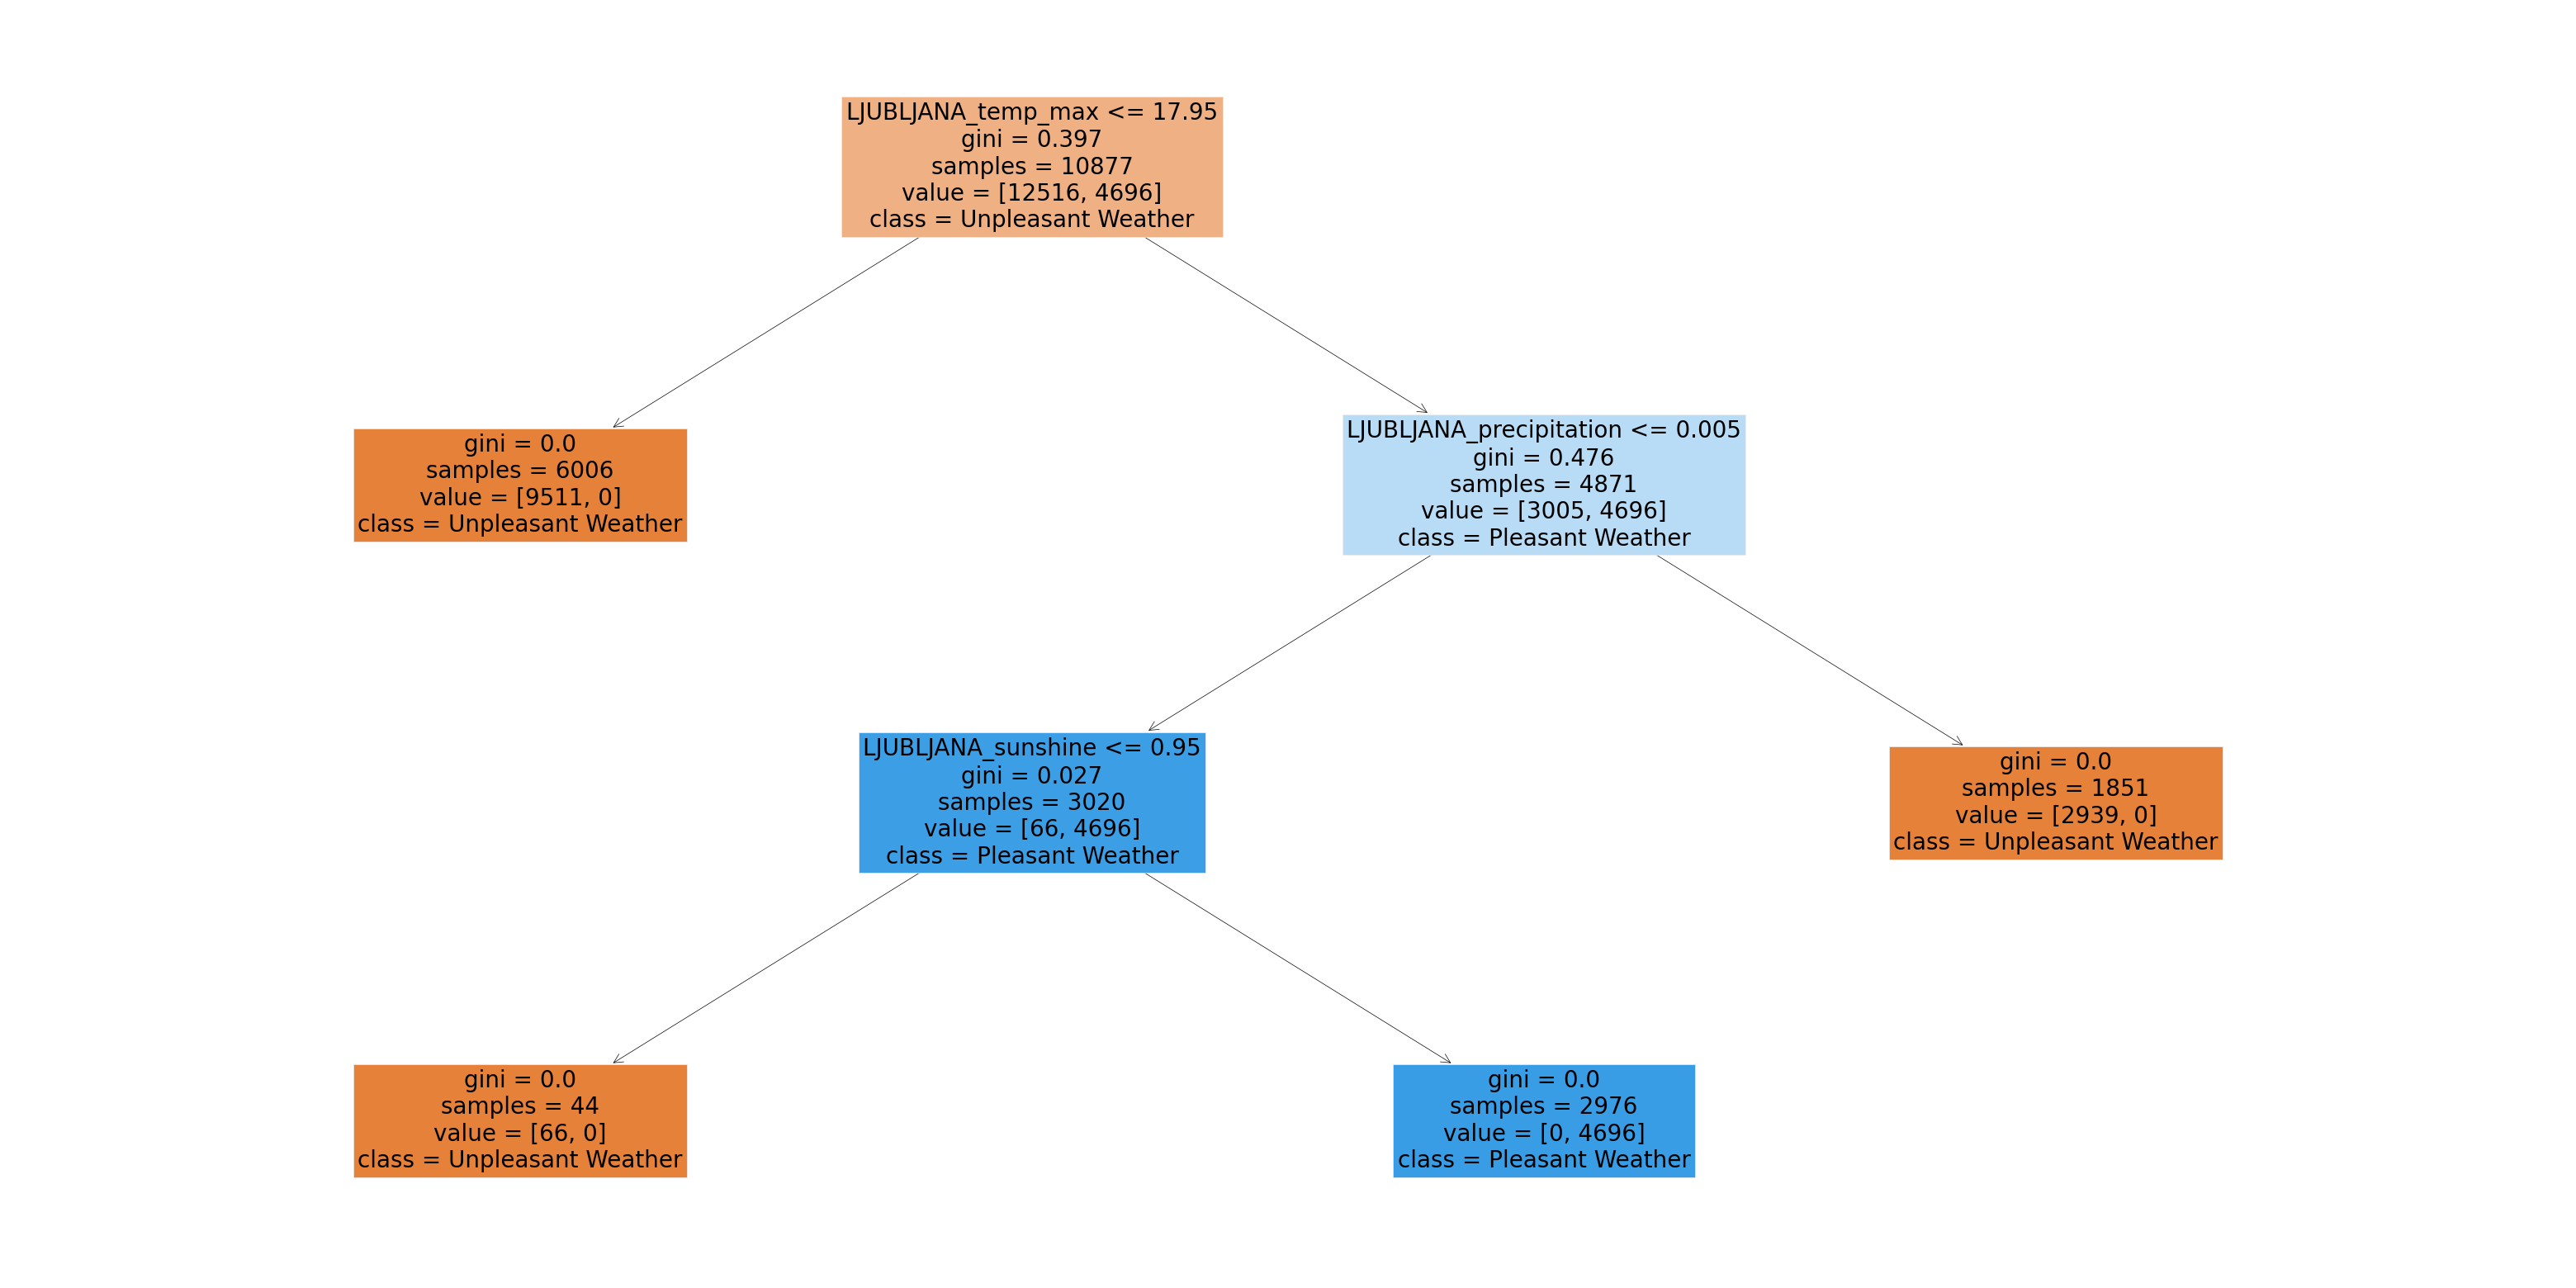

In [80]:
# Plot random forest (Ljubljana)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf.estimators_[5], fontsize = 20, feature_names=ljubljana.columns, class_names=['Unpleasant Weather','Pleasant Weather'], filled=True)
plt.savefig(os.path.join(path, 'Unsupervised','2.3_ljubljana_forest.png'), bbox_inches = 'tight')
plt.show();


### Ljubljana's Important Measurements.

In [81]:
# Retrieve feature importances from the trained model
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)
print(feature_importances.shape)


Feature Importances: [0.0330994  0.01418832 0.00814548 0.11115085 0.35833621 0.09198578
 0.09592021 0.02841265 0.25876108]
(9,)


In [82]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]


In [83]:
# Create a dataframe to associate observation measurements with their importances
importances_df = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances
})

In [84]:
# Sort by importance for chart readability
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df)


Feature Importance:
        Measurement  Importance
4     precipitation    0.358336
8          temp_max    0.258761
3  global_radiation    0.111151
6         temp_mean    0.095920
5          sunshine    0.091986
0       cloud_cover    0.033099
7          temp_min    0.028413
1          humidity    0.014188
2          pressure    0.008145


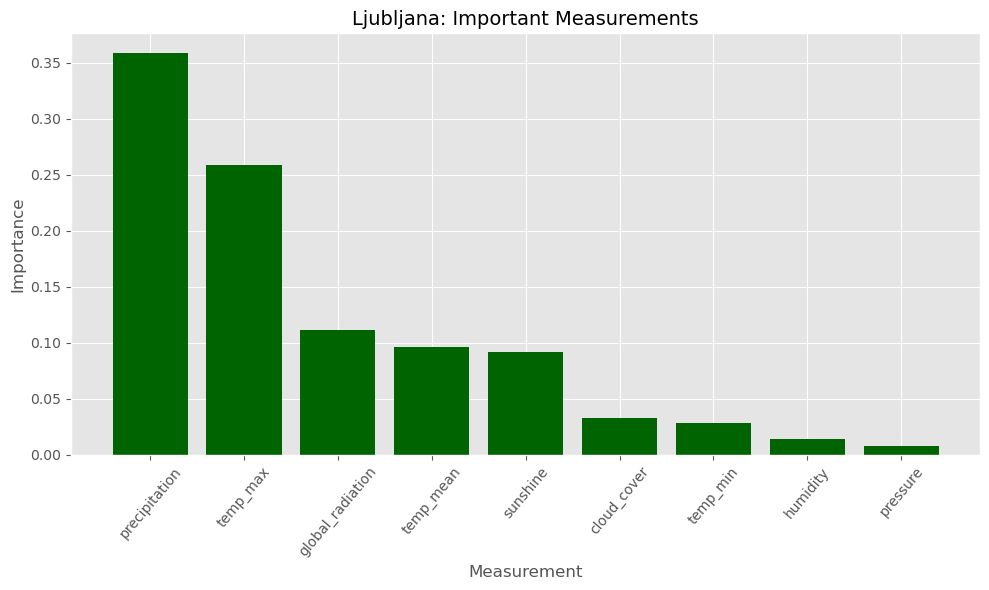

In [85]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df['Measurement'], importances_df['Importance'], color='darkgreen')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Ljubljana: Important Measurements", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Unsupervised','2.3_ljubljana_important_measurements.png'), bbox_inches = 'tight')
plt.show()

### Ljubljana's top three important measurements are Precipitation, Temp Max and Global Radiation.